# Data Analysis for Machine Learning Intro

In [348]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [349]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Inspecting Impact of Numeric Data

In [350]:
grouping_df = df.drop(['Department', 'salary'], axis=1)
grouping_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Insights from Numeric Data:**
- Retained employees high average satisfaction level
- Have less average monthly hours
- Less time spend in company
- High work accident
- Was promoted in last 5 years

## Inspecting impact of categorical Data

### Impact of Department

In [351]:
dept_dt = pd.crosstab(df.Department, df.left)
labels = dept_dt.index.tolist()
print(labels)
x_ticks = np.arange(len(labels))
print(x_ticks)
dept_dt

['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']
[0 1 2 3 4 5 6 7 8 9]


left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


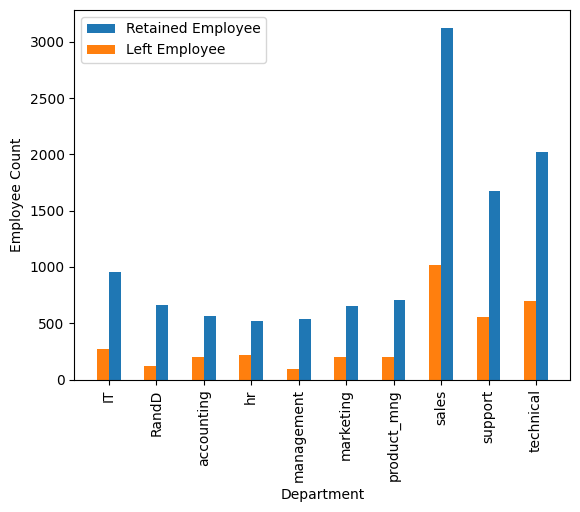

In [352]:
bar_width = 0.25
plt.bar(x_ticks + bar_width/2, dept_dt[0], width=bar_width, label='Retained Employee')
plt.bar(x_ticks - bar_width/2, dept_dt[1], width=bar_width, label='Left Employee')
# plt.bar(labels, dt[0])
plt.xticks(x_ticks, labels, rotation='vertical')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.legend()

### Impact of Salary

In [353]:
salary_dt = pd.crosstab(df.salary, df.left)
salary_labels = salary_dt.index.tolist()
print(salary_labels)
salary_x = np.arange(len(salary_labels))
print(salary_x)
salary_dt

['high', 'low', 'medium']
[0 1 2]


left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


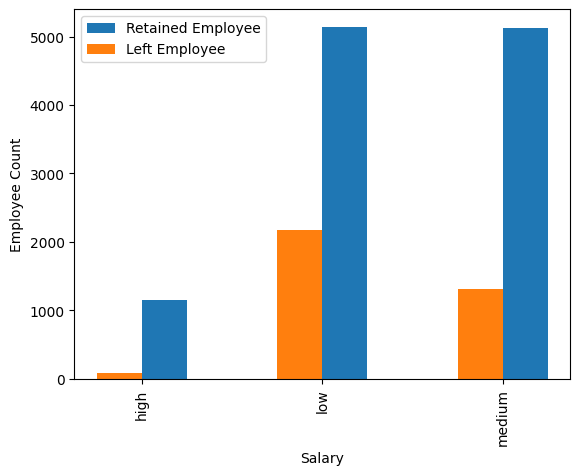

In [354]:
bar_width = 0.25
plt.bar(salary_x + bar_width/2, salary_dt[0], width=bar_width, label='Retained Employee')
plt.bar(salary_x - bar_width/2, salary_dt[1], width=bar_width, label='Left Employee')
# plt.bar(labels, dt[0])
plt.xticks(salary_x, salary_labels, rotation='vertical')
plt.xlabel('Salary')
plt.ylabel('Employee Count')
plt.legend()

### Insight:
- Employee with low salary tend to leave

## Chosen Columns to Train Model
- Satisfaction Level
- Average Monthly Hours
- Promotion In Last 5 Years
- Salary


In [355]:
c_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']] # Chosen Dataframe from given data
c_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [356]:
ohe = OneHotEncoder()
encoded_column = ohe.fit_transform(c_df[['salary']])
encoded_df = pd.DataFrame(encoded_column.toarray(), columns=ohe.get_feature_names_out(['salary']))
encoded_df = pd.concat((c_df, encoded_df), axis=1)

# Drop salary and salary_high to escape dummy variable trap
encoded_df = encoded_df.drop(['salary', 'salary_high'], axis=1)
encoded_df

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium
0,0.38,157,0,1,1.0,0.0
1,0.80,262,0,1,0.0,1.0
2,0.11,272,0,1,0.0,1.0
3,0.72,223,0,1,1.0,0.0
4,0.37,159,0,1,1.0,0.0
...,...,...,...,...,...,...
14994,0.40,151,0,1,1.0,0.0
14995,0.37,160,0,1,1.0,0.0
14996,0.37,143,0,1,1.0,0.0
14997,0.11,280,0,1,1.0,0.0


## Creating Training Dataset

In [357]:
X=encoded_df.drop(['left'], axis=1).values
y=encoded_df['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [358]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(f'Model Accuracy: {model.score(X_test, y_test) * 100}%')

Model Accuracy: $79.06666666666666%
